In [131]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

epsilon_0 = 8.854187 * 10**-12
k = 1 / (4 * np.pi *epsilon_0)

#Class which each point charge we use in calculation is an istance of
class point_charge:
    def __init__(self, coordinates, charge):
        self.coords = coordinates
        self.charge_val = charge

#Function to define the 'squiggle r' for a given charge and point, this is the distance between charge and point
def get_r_vec(charge, point):
    squiggle = [0, 0]
    for i in range(2):
        squiggle[i] = point[i] - charge.coords[i]
    return squiggle

#Function to get the magnitude of any vector
def get_r_magnitude(vector):
    magnitude = 0
    for var in vector:
        magnitude += var**2
    return np.sqrt(magnitude)

#Function to get the direction of any vector
def get_r_hat(vector, magnitude):
    return vector / magnitude

#Function used to calculate the Electric field at a given point generated by a given list of charges
def get_e_field(point, charges):
    field_at_point = [0, 0]
    for charge in charges:
        squiggle = get_r_vec(charge, point)
        dist = get_r_magnitude(squiggle)
        unit_vec = get_r_hat(squiggle, dist)
        contribution = (charge.charge_val / dist**2) * unit_vec
        field_at_point += contribution
    field_at_point = field_at_point * k
    return field_at_point

#Function used to generate a list of charges distributed randomly along the unit circle. N charges are generated.
def charge_arrange(charge_total, num_of_charges, graphing = False, plot = "null"):
    charges = []
    for i in range(num_of_charges):
        angle = np.random.randint(0, 359)
        y = np.sin(angle)
        x = np.cos(angle)
        charge_per = (charge_total) / float(num_of_charges)
        charge = point_charge((x, y), charge_per)
        charges.append(charge)
        if(graphing == True):
            plot.plot(x, y, 'ro')
    return charges

#Function to collect the electric field data at a given point for a list of n discrete charges
#Default charge is one micro coloumb
def collect_field_data(field_point, n_charges_list, charge_total = 0.000001):
    e_field_data = []
    for n in n_charges_list:
        e_field_data.append(get_e_field(field_point, charge_arrange(charge_total, n)))
    return e_field_data

In [149]:
#Defines the list of n's we will collect data from, where n is a number of discrete charges
n = np.linspace(5, 100000, 20)
num = []
for i in n:
    num.append(int(i))
    
#Calls the main function for data collection and stores data in e_field_data
e_field_data = collect_field_data((1.5, 0), num)

In [150]:
#Function for extracting column i from multi dimensional array/list
def column(matrix, i):
    return [row[i] for row in matrix]

#Gathering x and y components of our field data
x_data = column(e_field_data, 0)
y_data = column(e_field_data, 1)

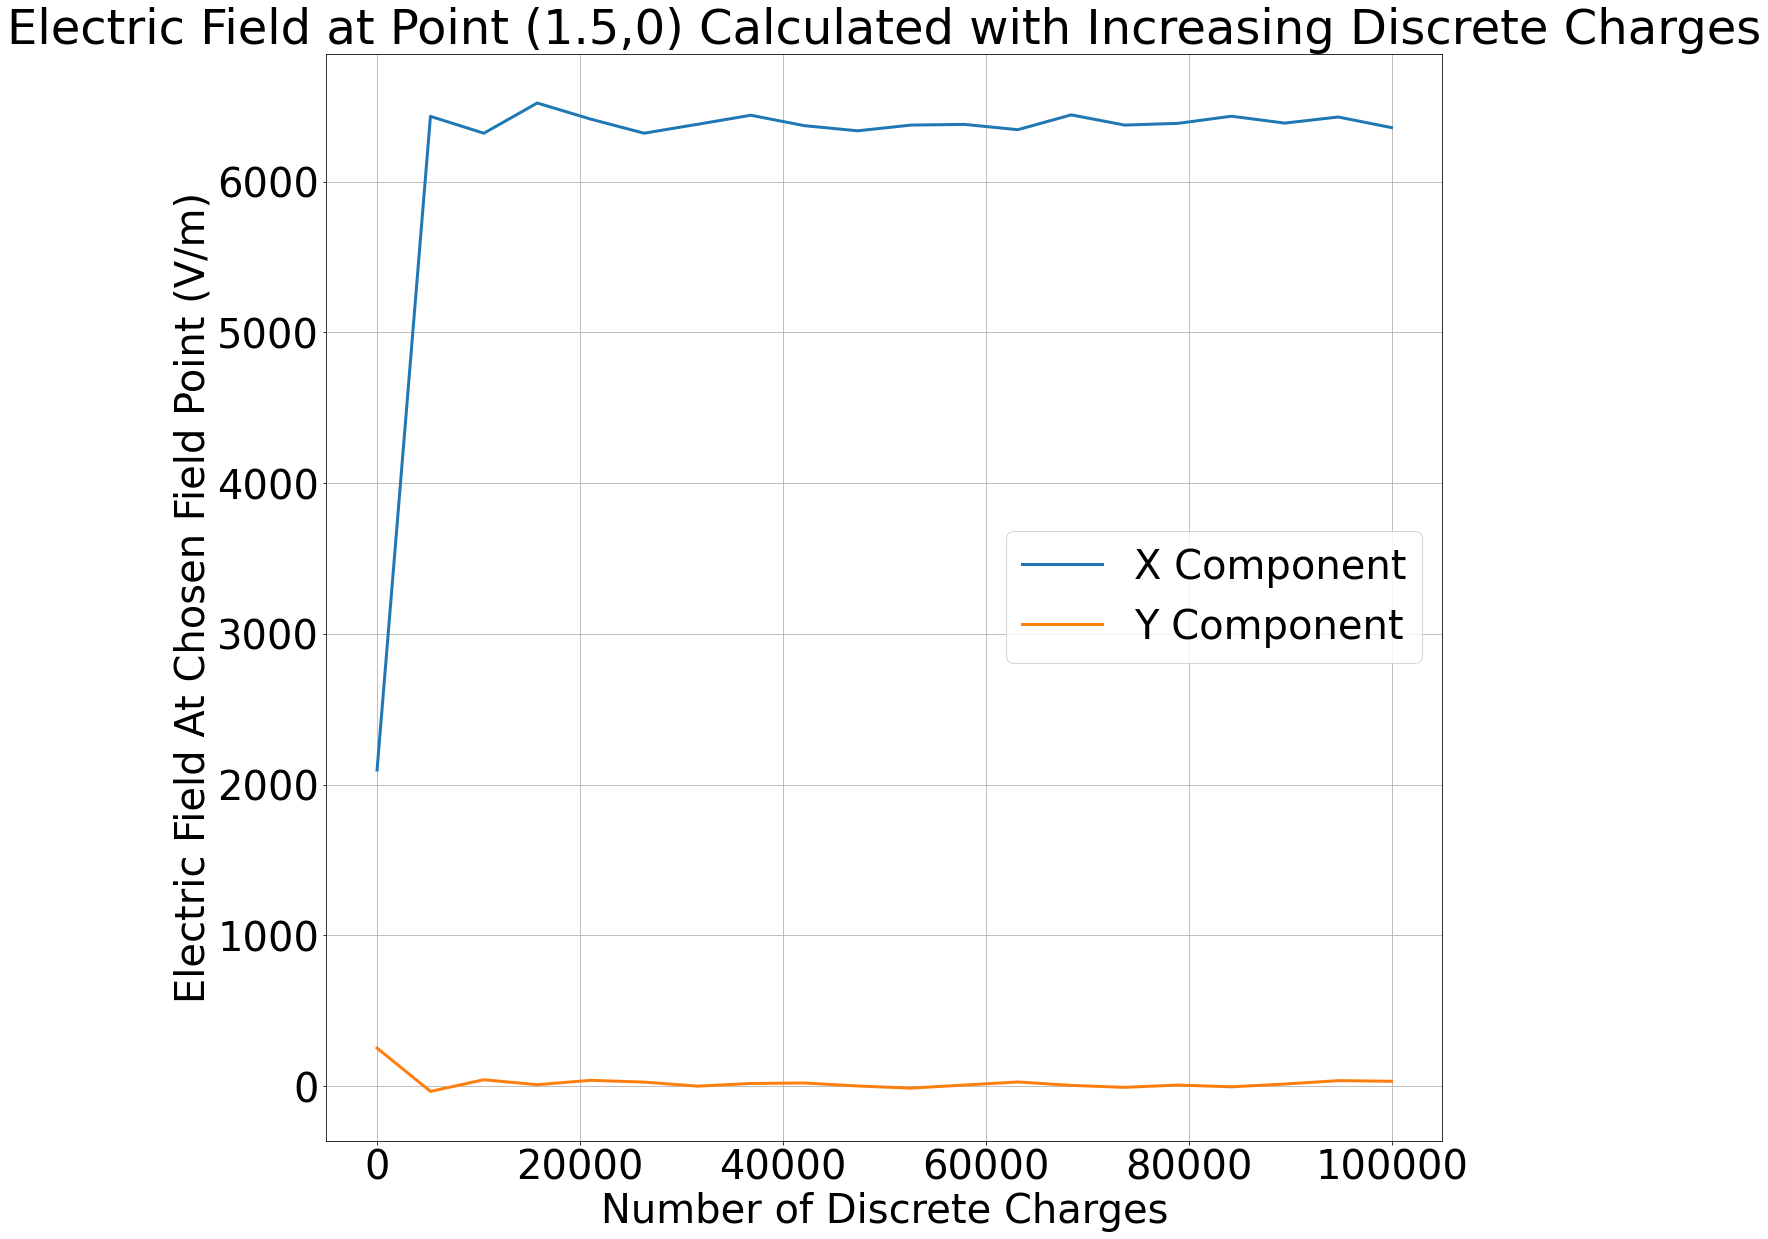

In [151]:
#Setting up our graph using matplotlibrary
fig, ax = plt.subplots(figsize = (20, 20))
ax.plot(n, x_data, lw = 3, label = "X Component")
ax.plot(n, y_data, lw = 3, label = "Y Component")
ax.grid()
ax.set(xlabel = 'Number of Discrete Charges', ylabel = "Electric Field At Chosen Field Point (V/m)", title = 'Electric Field at Point (1.5,0) Calculated with Increasing Discrete Charges')
matplotlib.rcParams.update({'font.size': 40})
ax.legend()

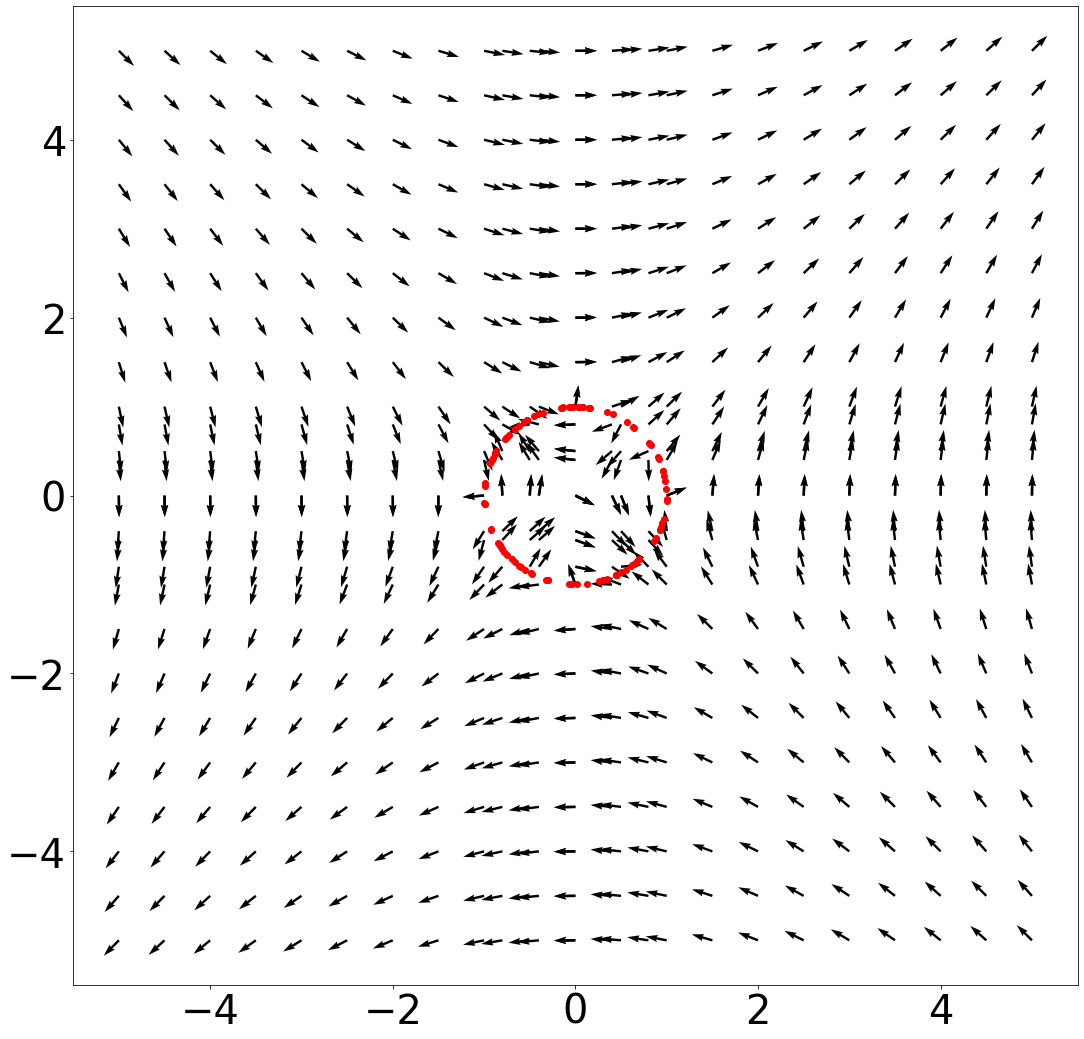

In [152]:


#Generate new set of charges to plot graphically, and plot as plot = True
plot1_charges = charge_arrange(1, 100, True, ax1)

#Places to store data to put into our quiver plot
e_field_data_100x = []
e_field_data_100y = []

#Set up our grid to graph and calculate our field at
x = np.append(np.linspace(-5, 5, 21), np.linspace(-0.8, 0.8, 5))
y = x
xx, yy = np.meshgrid(x, y)

#For loop calculates field at each point of the graph, and also seperates the x and y component
for xpos in x:
    for ypos in y:
        x_val, y_val = get_e_field((xpos, ypos), plot1_charges)
        e_mag = np.sqrt(x_val**2 + y_val**2)
        x_dir = x_val / e_mag
        y_dir = y_val / e_mag
        e_field_data_100x.append(x_dir)
        e_field_data_100y.append(y_dir)

#Setting up graph using matplotlibrary
fig, ax1 = plt.subplots(figsize = (18, 18))
ax1.quiver(xx, yy, e_field_data_100x, e_field_data_100y, cmap = 'autumn')
#ax1.tricontourf(x, y, field_magnitude_data)
